# AR(p)
# Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.ar_model import  AR, ARResults
from sklearn.metrics import mean_squared_error
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')


In [4]:
df= pd.read_csv("../data/uspopulation.csv",index_col="DATE",parse_dates=True)
df.index.freq="MS"
df

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


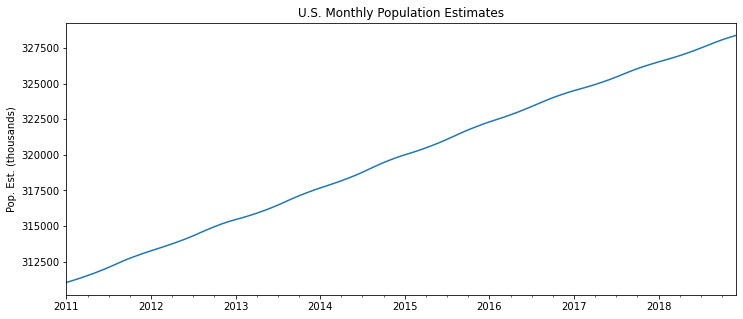

In [5]:
'''
So let's go ahead and set one year for testing.

And because this monthly start, if we check the length of our data frame right now we have 96

months, which means if we want one year off of this 96-12=84 months, well that's 84.
'''
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [7]:
len(df)

96

In [8]:
96-12

84

In [9]:
'''

So we'll say our training set is df.iloc[:84].

Starting from the beginning, all the way to 84 and then for the test set will say df.iloc[84:]
starting at eighty four all the way to the end.
'''

train=df.iloc[:84]
test=df.iloc[84:]

## Fit an AR(1) Model

In [11]:
'''
So let's go ahead and fit in our order one model.

So this is the simplest model possible.

Basically, just looking back at one time stamp lag's, can we predict the next timestamp into the future?


So we will say our model is equal to we take that AR model and let's go ahead and train it on the
training data.

So we'll grab our training data frame and just grab the pop steer estimated population.

The most important one is essentially this one Max flag, which defines the order of the auto regression
model we're going to use.

So the simplest one possible is just order one, essentially just use one lag coefficient behind so
we can say max lag is equal to one.

Another parameter you can play around with is this method parameter.
So there's different ways of solving these equations if you're dealing with higher order functions.

There's conditional maximum likelihood using OLS or ordinarily least squares, and then there's also unconditional
exact maximum likelihood.



'''
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        159.873152
L1.PopEst      0.999498
dtype: float64


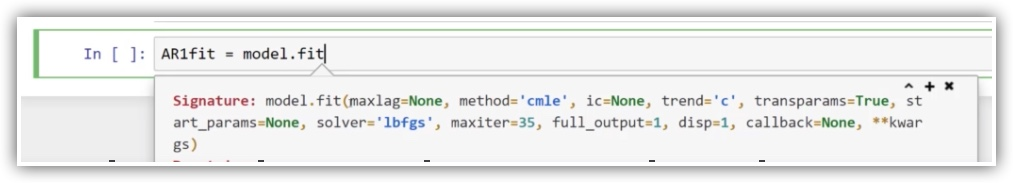

In [15]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-29_23-49-10.jpg')

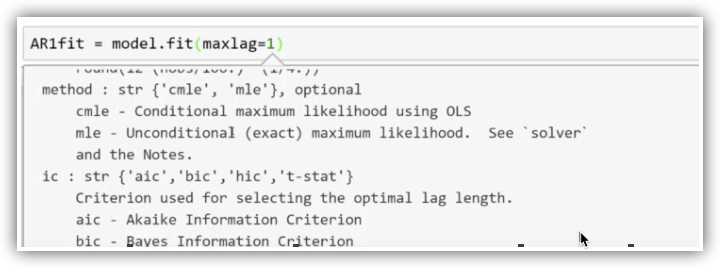

In [16]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-29_23-53-08.jpg')

In [17]:
'''
But we'll also be able to actually grab the constant value.

So if you say, k_ar, that tells you how many legs or the order of K that this model is.

'''
AR1fit.k_ar

1

In [18]:
'''
if you say AR1fit.params, it will actually report
back to you the constants as well as that coefficient variable.

So notice for an order one auto regression model, the constant that was SOL for ended up being 159 and 
then it gives it basically a phi value of almost one for that lag one.

So this is building out the equation that we would use to solve for one timestamp into the future.

'''
AR1fit.params

const        159.873152
L1.PopEst      0.999498
dtype: float64

In [21]:
start = len(train)
end=len(train)+len(test)-1

start,end

(84, 95)

In [22]:
'''
in order to predict using an a fitted auto regression model you call AR1fit.predict
And what you want to do here is give it a start and an end and we'll go ahead and keep dynamic as the
default false.

So essentially want to say, can we predict for a certain index point start all the way to another index
point?

And we want to do is do it for a test set.

And if we just run this, it reports back predictions for those particular dates.
'''
AR1fit.predict(start=start,end=end)

2018-01-01    326373.955115
2018-02-01    326369.912262
2018-03-01    326365.871439
2018-04-01    326361.832645
2018-05-01    326357.795880
2018-06-01    326353.761142
2018-07-01    326349.728431
2018-08-01    326345.697745
2018-09-01    326341.669083
2018-10-01    326337.642445
2018-11-01    326333.617829
2018-12-01    326329.595234
Freq: MS, dtype: float64

In [23]:
'''
And if we take a look at our test set, those are actually the same dates right here. 2018-01-01
'''
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [24]:
'''
So let's go ahead and compare compare our predicted values to our real known test values.


'''
predictions1=AR1fit.predict(start=start,end=end)
predictions1=predictions1.rename("AR(1) Predictions")
predictions1

2018-01-01    326373.955115
2018-02-01    326369.912262
2018-03-01    326365.871439
2018-04-01    326361.832645
2018-05-01    326357.795880
2018-06-01    326353.761142
2018-07-01    326349.728431
2018-08-01    326345.697745
2018-09-01    326341.669083
2018-10-01    326337.642445
2018-11-01    326333.617829
2018-12-01    326329.595234
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [25]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326373.9551, expected=326527
predicted=326369.9123, expected=326669
predicted=326365.8714, expected=326812
predicted=326361.8326, expected=326968
predicted=326357.7959, expected=327134
predicted=326353.7611, expected=327312
predicted=326349.7284, expected=327502
predicted=326345.6977, expected=327698
predicted=326341.6691, expected=327893
predicted=326337.6424, expected=328077
predicted=326333.6178, expected=328241
predicted=326329.5952, expected=328393


<AxesSubplot:xlabel='DATE'>

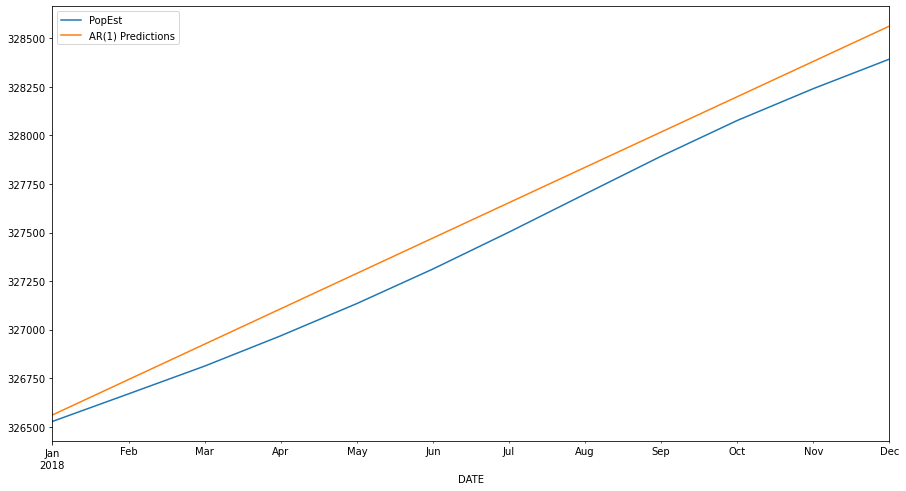

In [92]:
'''
So we already have our test data set.
Let's go ahead and plot out the test data set.

But you can see here our predictions aren't so bad, especially considering that we're only considering
one lag point in the past.

So essentially, we're just calculating based off one previous month, what the next month is going
to be.

And even that we can get the general trend.

And it looks like we're overestimating the number of births, but the actual general trend seems pretty good.
'''
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)

## Fit an AR(2) Model

In [35]:
'''
let's see if we can improve on this by expanding the actual order from auto
regression, order one to auto regression, order two.

And theoretically, hopefully this should be better because now we're using more points, more history
to predict the next one.
'''
model=AR(train["PopEst"])
AR2fit=model.fit(maxlag=2)

In [36]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [37]:
predictions2=AR2fit.predict(start=start,end=end)
predictions2=predictions2.rename("AR(2) Predictions")
predictions2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944948
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826847
2018-09-01    327829.064480
2018-10-01    327992.414809
2018-11-01    328155.804859
2018-12-01    328319.172308
Freq: MS, Name: AR(2) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

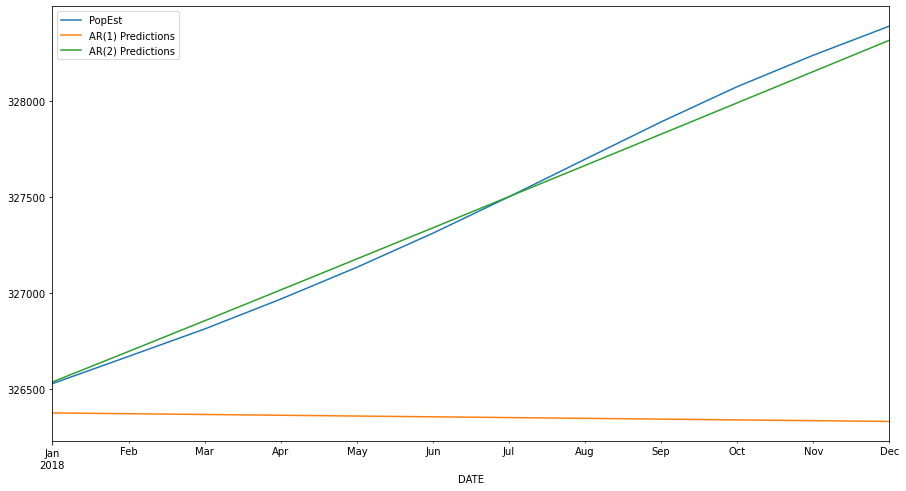

In [38]:
'''
But this green line is much closer to the true test values on order to avoid a regression than this
order one.
So we're no longer overestimating as much as order one.

'''
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [39]:
'''

So you may be wondering, how do I actually get the correct order value?
How do I figure out what is the best order value?

So what we can do is we can actually let stats models choose that P for us.

Remember when we were looking back at that equation in the last lecture, we noticed that it goes up
to some order P so we've done P =1, P =2.

Let's go ahead and just let stats models figure out what P should be.


So to do that we simply say are fit and we're going to say model dot fit.

And now we're not going to include the actual lags.

We're not going to even say max lag's because if max flag the default is none and if you leave it at
none, that's models is then going to take it upon itself to try to figure out what's the best level.


There is IC paramter

basically stands for the criterion used for selecting the optimal lag length.

And there's a ton of different types of criterions.

There's a kaiseki information criterion or AIC.

There's also a bayes information criterion.

There's T stat based on last lag and so on.

So what I'm going to do is instead of just leaving it none, what I will do is I'll go ahead and specify
t stat.

'''
model=AR(train["PopEst"])
ARfit=model.fit(ic='t-stat')

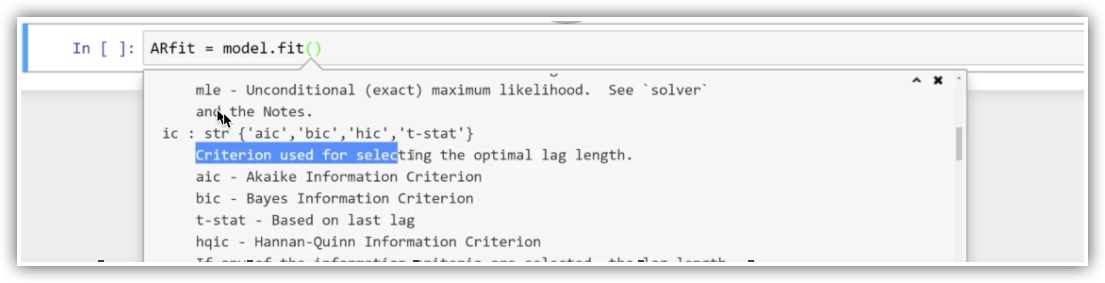

In [40]:
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Jose Portilla/Python for Time Series Data Analysis/Image/2021-10-30_00-15-32.jpg')

In [41]:
'''
And you'll notice we have different levels of lag, like L1.popEst, like L2.popEst, like L3.popEst and so on.

So based off our information criterion, essentially our measure of error stats models decided that
it should have 8 lag or order eight.

'''

ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [42]:
predictions=ARfit.predict(start=start,end=end)
predictions=predictions.rename("AR(auto) Predictions")
predictions

2018-01-01    326523.865563
2018-02-01    326662.772583
2018-03-01    326805.746899
2018-04-01    326960.064250
2018-05-01    327130.572975
2018-06-01    327315.962832
2018-07-01    327511.010158
2018-08-01    327710.938426
2018-09-01    327907.425615
2018-10-01    328092.870853
2018-11-01    328264.133756
2018-12-01    328421.667317
Freq: MS, Name: AR(auto) Predictions, dtype: float64

<AxesSubplot:xlabel='DATE'>

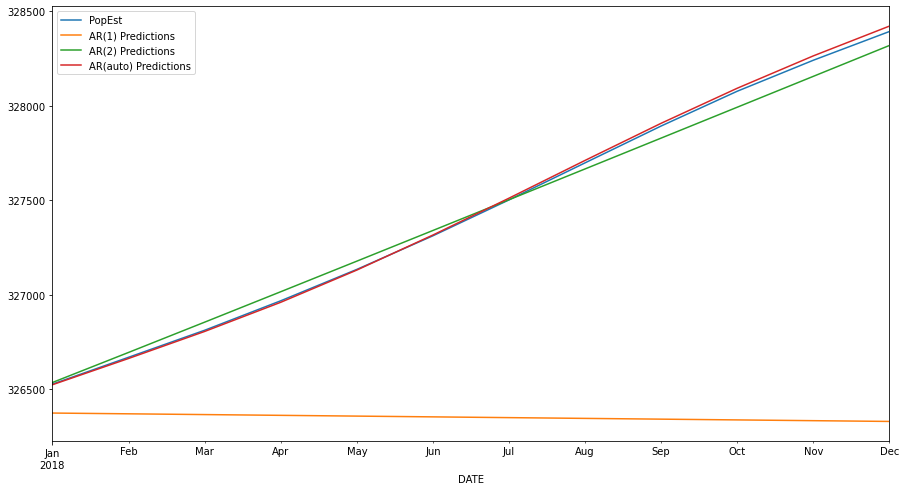

In [43]:
'''

It thinks based off my information criterion that I chose 8 lag's should be the most accurate model,
which is interesting specifically since we just saw that even 2 Lag is performing quite well.


So now when I run this, you'll notice that the red and blue line are almost right on top of each other.

So it's extremely impressive that even for this long of a data set, so this many years, remember,

this goes back quite far by just looking eight months into the past, you can accurately predict what

the U.S. population will be in that ninth month.

So that's extremely impressive.

'''
test.plot(figsize=(15,8),legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions.plot(legend=True)

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [101]:
'''
We'll go ahead and evaluate it using some metrics from sklearn and we'll evaluate it again against the
test set

So all are essentially doing is going along, comparing each of these three prediction values so that
calculates that error.


OK, so let's run this and here we can see that order. One, the mean squared error was quite large.

Order two was already basically an entire order down.
So this was in the ranges of ten thousands and this is now in the range of thousands.

And then auto regression I order eight is another level down kind of in the hundreds there.

'''

labels=["AR1","AR2","AR(Auto or 8)"]
preds=[predictions1,predictions2,predictions]
for i in range(3):
    error=mean_squared_error(test["PopEst"],preds[i])
    print(f"{labels[i]} MSE error was {error}")

AR1 MSE error was 17449.714239577344
AR2 MSE error was 2713.258615675103
AR(Auto or 8) MSE error was 186.97377437908688


We see right away how well AR(11) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

In [46]:
'''
OK, so we're going to do now is show you now how to forecast on future data.

Essentially, let's try to predict the U.S. population for twenty twenty.

very first step should be retraining the model on the full data set.

Remember we've moved on from predicting an evaluation to now true forecasting.


Rebuild the model and I'm going to rebuild it on the entire data set, because at this point, 
I'm not really going to be able to evaluate the future.

So I might as well retrain on everything.

Next, I'm going to fit the model.

'''
model=AR(df["PopEst"])
ARFit=model.fit(ic='t-stat')
forecasted_value=ARFit.predict(start=len(df),end=len(df)+24).rename("Forecast")

<AxesSubplot:xlabel='DATE'>

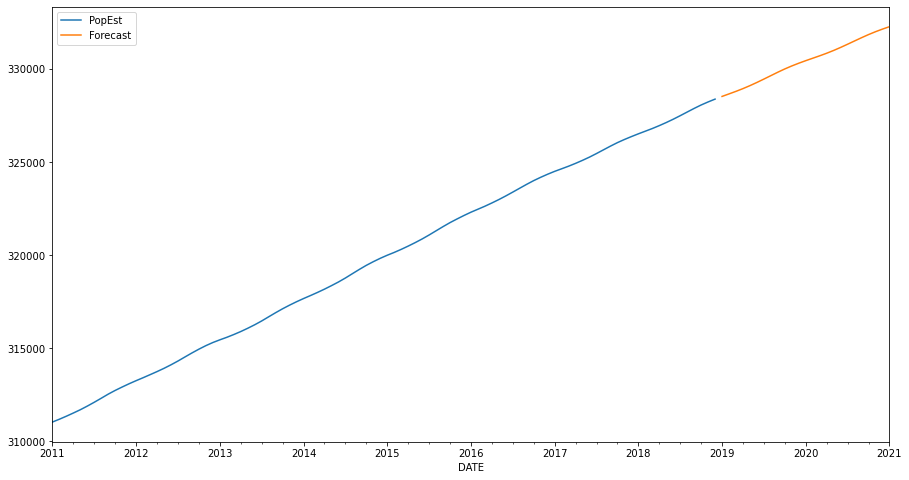

In [47]:
'''
And there we go, there are our forecasted values all the way into the year twenty twenty.
So we have our current true population values and now we were able to successfully forecast into the

future that we don't know about.

'''
df["PopEst"].plot(figsize=(15,8),legend=True)
forecasted_value.plot(legend=True)

In [45]:
forecasted_value

2019-01-01    328537.420460
2019-02-01    328673.215482
2019-03-01    328810.443203
2019-04-01    328957.592904
2019-05-01    329117.335864
2019-06-01    329289.277172
2019-07-01    329470.144189
2019-08-01    329655.073540
2019-09-01    329839.482938
2019-10-01    330015.434908
2019-11-01    330175.675939
2019-12-01    330322.580131
2020-01-01    330459.617300
2020-02-01    330589.980419
2020-03-01    330720.644543
2020-04-01    330858.630853
2020-05-01    331008.624958
2020-06-01    331171.295301
2020-07-01    331343.206339
2020-08-01    331519.078700
2020-09-01    331693.966525
2020-10-01    331861.248166
2020-11-01    332015.234109
2020-12-01    332155.792896
2021-01-01    332285.710833
Freq: MS, dtype: float64